In [1]:
%cd D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social

D:\Universidad\Computer_Vision_UAO\Proyecto_de_curso_CVwDP\od_distanciamiento_social


In [2]:
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)

C:\Users\steven\anaconda3\envs\deepia\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\steven\anaconda3\envs\deepia\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\steven\anaconda3\envs\deepia\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\steven\anaconda3\envs\deepia\lib\site-packages\tensorflow\

1.14.0
2.2.4


Using TensorFlow backend.


**Instalar librerias y repositorio de keras retinanet**

In [3]:
!pip install imutils
!pip install beautifulsoup4
!git clone https://github.com/fizyr/keras-retinanet

fatal: destination path 'keras-retinanet' already exists and is not an empty directory.


**Instalar keras retinanet**

In [4]:
%cd D:\Universidad\Computer_Vision_UAO\Proyecto_de_curso_CVwDP\od_distanciamiento_social\keras-retinanet
!git checkout 42068ef9e406602d92a1afe2ee7d470f7e9860df
!python setup.py install

D:\Universidad\Computer_Vision_UAO\Proyecto_de_curso_CVwDP\od_distanciamiento_social\keras-retinanet


HEAD is now at 42068ef Merge pull request #621 from borakrc/fix-anchor-boxes-not-shown


running install
running bdist_egg
running egg_info
writing keras_retinanet.egg-info\PKG-INFO
writing dependency_links to keras_retinanet.egg-info\dependency_links.txt
writing entry points to keras_retinanet.egg-info\entry_points.txt
writing requirements to keras_retinanet.egg-info\requires.txt
writing top-level names to keras_retinanet.egg-info\top_level.txt
reading manifest file 'keras_retinanet.egg-info\SOURCES.txt'
writing manifest file 'keras_retinanet.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
running build_ext
skipping 'keras_retinanet/utils\compute_overlap.c' Cython extension (up-to-date)
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\keras_retinanet
creating build\bdist.win-amd64\egg\keras_retinanet\backend
copying build\lib.win-amd64-3.7\keras_retinanet\backend\cntk_backend.py -> build\bdist.win-amd64\egg\keras_retinanet\backend
copying build\lib.win-amd64-3.7\keras_retinanet\backend\co

zip_safe flag not set; analyzing archive contents...
keras_retinanet.bin.__pycache__.convert_model.cpython-37: module references __file__
keras_retinanet.bin.__pycache__.debug.cpython-37: module references __file__
keras_retinanet.bin.__pycache__.evaluate.cpython-37: module references __file__
keras_retinanet.bin.__pycache__.train.cpython-37: module references __file__
keras_retinanet.utils.__pycache__.compute_overlap.cpython-37: module references __file__


**Probar que la instalación haya sido exitosa**

In [5]:
%cd D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/keras-retinanet/

D:\Universidad\Computer_Vision_UAO\Proyecto_de_curso_CVwDP\od_distanciamiento_social\keras-retinanet


In [6]:
!retinanet-train

Using TensorFlow backend.
C:\Users\steven\anaconda3\envs\deepia\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\steven\anaconda3\envs\deepia\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\steven\anaconda3\envs\deepia\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\steven\anaconda3\envs\deepia\lib

**Se usará el mismo archivo de dataset de 10k imagenes que se usó en Faster RCNN**

In [7]:
from bs4 import BeautifulSoup
import os

dataset_path = "D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/keras-retinanet/"

# Ruta de archivo con clases
CLASSES_CSV = os.path.sep.join([dataset_path, "retinanet_classes.csv"])

#Clases a usar 
CLASSES = ["Person"]
# write the classes to file
print("[INFO] clases a usar...")
csv = open(CLASSES_CSV, "w")
rows = [",".join([c, str(i)]) for (i, c) in enumerate(CLASSES)]
csv.write("\n".join(rows))
csv.close()

[INFO] clases a usar...


**Comprobar que se haya creado el archivo de clases, creando un CSV con la clase y un numero indicando la etiqueta asociada, en este caso como es solo una clase "Person", se adiciona la etiqueta "0"**

In [8]:

%ls

 El volumen de la unidad D es Informacion
 El n£mero de serie del volumen es: 3875-34A3

 Directorio de D:\Universidad\Computer_Vision_UAO\Proyecto_de_curso_CVwDP\od_distanciamiento_social\keras-retinanet

27/03/2021  03:43 p.ÿm.    <DIR>          .
27/03/2021  03:43 p.ÿm.    <DIR>          ..
24/03/2021  10:53 p.ÿm.                57 .gitignore
24/03/2021  10:52 p.ÿm.               119 .gitmodules
24/03/2021  10:53 p.ÿm.               663 .travis.yml
27/03/2021  07:12 p.ÿm.    <DIR>          build
24/03/2021  10:53 p.ÿm.               849 CONTRIBUTORS.md
27/03/2021  07:12 p.ÿm.    <DIR>          dist
27/03/2021  01:52 p.ÿm.           470.005 entrenamiento1000.txt
24/03/2021  10:53 p.ÿm.    <DIR>          examples
24/03/2021  10:52 p.ÿm.    <DIR>          images
24/03/2021  10:53 p.ÿm.             1.362 ISSUE_TEMPLATE.md
24/03/2021  11:13 p.ÿm.    <DIR>          keras_retinanet
27/03/2021  08:29 p.ÿm.    <DIR>          keras_retinanet.egg-info
24/03/2021  10:52 p.ÿm.            11.558 

**Descargar los pesos de la red que usara como backbone**

In [9]:
#%cd /gdrive/MyDrive/Especializaciones_TIC_UAO/Especializacion_IA/Computer_Vision/proyecto/
#!wget https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5

**entrenamiento**

In [10]:
# Opening a file
file = open("entrenamiento1000.txt","r")
Counter = 0
  
# Reading from file
Content = file.read()
CoList = Content.split("\n")
  
for i in CoList:
    if i:
        Counter += 1
          
print("La cantidad de anotaciones es:")
print(Counter)

La cantidad de anotaciones es:
3809


**De acuerdo al numero de anotaciones, calculamos el Step Per Epoch, como actualmente contamos con una GTX 850M como GPU, podemos disponer de 4GB de memoria de GPU, por ende, podremos procesar aproximadamente un batch size de 4 imagenes, por lo tanto, dividimos 3809  para redondear de Steps per epoch**

**Comenzar Entrenamiento**

In [11]:
!mkdir retinanet_snapshots

Ya existe el subdirectorio o el archivo retinanet_snapshots.


In [12]:
batch_size=1
steps_per_epoch = Counter//batch_size
print(steps_per_epoch)

3809


In [22]:
labels= D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/keras-retinanet/retinanet_classes.csv
train_file_dir = D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/keras-retinanet/entrenamiento1000.txt
model_train_dir= D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/keras-retinanet/resnet50_coco_best_v2.1.0.h5
logs_dir= D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/keras-retinanet/retinanet_snapshots

SyntaxError: invalid syntax (<ipython-input-22-6bc8b84714ad>, line 1)

In [1]:
%cd D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/keras-retinanet
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
!python setup.py build_ext --inplace
!pip install keras-resnet
!pip install .


D:\Universidad\Computer_Vision_UAO\Proyecto_de_curso_CVwDP\od_distanciamiento_social\keras-retinanet
running build_ext
skipping 'keras_retinanet/utils\compute_overlap.c' Cython extension (up-to-date)
copying build\lib.win-amd64-3.7\keras_retinanet\utils\compute_overlap.cp37-win_amd64.pyd -> keras_retinanet\utils
  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=4c93e78219b3d316188c535aa9511e74fbe02446973153228ccc80e842d6e1ca
  Stored in directory: c:\users\steven\appdata\local\pip\cache\wheels\bd\ef\06\5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet
Processing d:\universidad\computer_vision_uao\proyecto_de_curso_cvwdp\od_distanciamiento_social\keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.4.1-cp37-cp37m-win_amd64.whl size=115713 sha256=634be2d430d4ba08cd92b21234551c8f13494ab2df6a527fb35c2a14612a6cdb
  Stored in d

In [ ]:
!retinanet-train --batch-size 1 --steps 3809 --epochs 50 --weights D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/keras-retinanet/resnet50_coco_best_v2.1.0.h5 --snapshot-path D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/keras-retinanet/retinanet_snapshots csv D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/keras-retinanet/entrenamiento1000.txt D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/keras-retinanet/retinanet_classes.csv

**Exportar nuestro modelo a .h5**

In [ ]:
!retinanet-convert-model D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/keras-retinanet/retinanet_snapshots/resnet50_csv_50.h5 retinanet_weights_person.h5

**Testear Modelo Entrenado**

In [ ]:
!retinanet-evaluate csv D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/keras-retinanet/test1000.txt D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/keras-retinanet/retinanet_classes.csv retinanet_weights_person.h5

**Usar Modelo para predicciones**

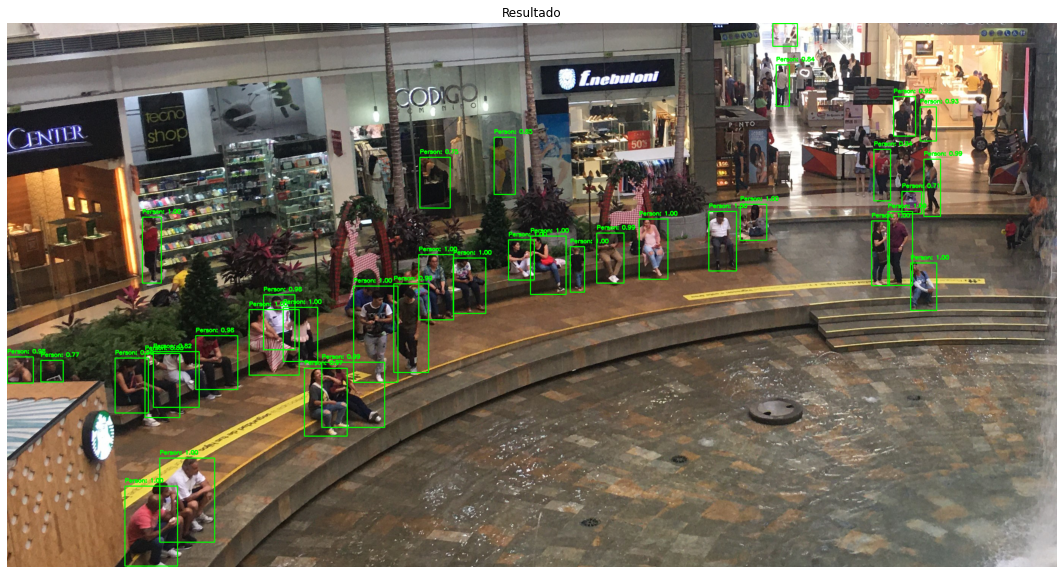

In [2]:
# import the necessary packages
from keras_retinanet.utils.image import preprocess_image
from keras_retinanet.utils.image import read_image_bgr
from keras_retinanet.utils.image import resize_image
from keras_retinanet import models
from matplotlib import pyplot as plt
import numpy as np

import cv2

labels= "D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/keras-retinanet/retinanet_classes.csv"
base_path = "D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/keras-retinanet"
model_dir="D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/retinanet_weights_person_uao_v1.h5"
image_test= "D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/unicentro.JPG"
min_confidence=0.7

# load the class label mappings
LABELS = open(labels).read().strip().split("\n")
LABELS = {int(L.split(",")[1]): L.split(",")[0] for L in LABELS}

# load the model from disk
model = models.load_model(model_dir, backbone_name="resnet50")

# load the input image (in BGR order), clone it, and preprocess it
image = read_image_bgr(image_test)
output = image.copy()
image = preprocess_image(image)
(image, scale) = resize_image(image)
image = np.expand_dims(image, axis=0)

# detect objects in the input image and correct for the image scale
(boxes, scores, labels) = model.predict_on_batch(image)
boxes /= scale

# loop over the detections
for (box, score, label) in zip(boxes[0], scores[0], labels[0]):
	# filter out weak detections
	if score < min_confidence:
		continue

	# convert the bounding box coordinates from floats to integers
	box = box.astype("int")

	# build the label and draw the label + bounding box on the output
	# image
	label = "{}: {:.2f}".format(LABELS[label], score)
	cv2.rectangle(output, (box[0], box[1]), (box[2], box[3]),
		(0, 255, 0), 2)
	cv2.putText(output, label, (box[0], box[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

image_rgb=cv2.cvtColor(output,cv2.COLOR_BGR2RGB)
#image_rgb=cv2.resize(image_rgb)
# show the output image
plt.figure(figsize=(30,10))
plt.title('Resultado')
plt.axis("off")
plt.imshow(image_rgb)
plt.savefig(base_path+"salida_retinanet_personas.png")
plt.show()
